#Business Understanding
The dataset is a collection of URLs followed by various attributes of the website and of the url itself. Each URL is assigned a Label that indicates whether the link is a phishing or legitimate site. The dataset was gathered to study and detect phishing websites. Phishing is one of the most prominent hacking methods used commonly. The method has been proven to evade human intuition and work on even the most vigilant victims. Phishing victims are subject to financial loss and reputational damages depending on the motive of the bad actors. This creates plenty of motivation for organizations to effectively detect and block potential phishing URLs before users even have an opportunity to click on them. In our particular dataset, we use the "label" attribute to determine if a URL is a legitimate or phishing link. (1 = Legitimate and 0 = Phish Link) If phishing and legitimate URLSs show different patterns, then the dataset provides useful knowledge for our prediction model. Attributes such as HasCopyrightInfo and HasSocialNet indicate some correlation with classifying as a legitimate link, inversely SpecialCharRatioinURL has correlation with phishing links. These attribute displaying correlation towards a specific label gives us confidence that the data collected is "useful". A prediction model for capturing phishing links should prioritize detecting as many phishing URLs as possible, even at the expense of more flagging legitimate links. In practice, it is imperative to detect phishing links because these are the methods that could potentially be exploited and flagging legitimate links have much smaller consequences. 

##Data Understanding
###Attribute Meaning and Data Type

##Identification and Text (Characters)
FILENAME
- ID of the origianl Text file or record for the URL

URL
- Full Website Address

Domain
- Main domain part of the URL

TLD
- Top-Level Domain

Title
- Page Title

##Lengths (Numeric)
URLLength
- Number of char in the full URL

DomainLength
- Number of char in domain

TLDLength
- Number of char in the TLD
  
NoOfSubDomain
- Count of subdomain in the URL

NoOfObfuscatedChar
- Count of obfuscated char

NoOfLettersInURL
- Count of letters in the URL (a-z,A-Z)

NoOfDegitsInRUL
- Digit Count in URL
- 
NoOfEqualsInURL/NoOfQMarkInURL/NoOfAmpersandInURL/NoOfOtherSpecialCharsInURL
- Counts of types of special char in the URL

LineOfCode
- Totalnumber of lines of HTML code on the page

LargestLineLength
- Length of longest line of HTML

NoOfURLRedirct/NoOfSelfRedirect
-Number of URL redirects and redirects to the same domain

NoOfPopup/NoOfiFrame
- Number of popups and iFrames

NoOfImage/NoOfCSS/NoOfJS
- Count of images, CSS files, and JS Files
- 

NoOfSelfRef/NoOfEmptyRef/NoOfExternalRef
- Number of links on page (internal,empty,external)


##Ratios,Probabilities, and Similarity Scores ("Oh My") (Numeric/Floating Point)
URLSimilarityIndex
- Similarity Score between URL and Index Reference

CharContinuationRate
- Rate at which char repeat patterns (Randomness)
  
TLDLegitimateProb
- Probability that TLD is associated with legitimate sites

URLCharProb
- Probability score based on char distribution in URL
  
ObfuscationRatio
- Proportion of obfuscated char relative to length of URL
  
LetterRatioInURL/DegitRatioInURL
-Char and Num ratio relative to URL Length

SpacialCharRatioInURL
- Ratio of special char in URL

DomainTitleMatchScore/URLTitleMatchScore
- Similarity scores between domain or URL Text and the page title

##Binary Flag (Numeric 1 or 0)
IsDomainIP
- 1 = If the domain is an IP addr
  
HasObfuscation
- 1= URL has obfuscation patterns

IsHTTPS  
- 1 = The url uses HTTPS

HasTitle  
- 1 = The page has a non-empty HTML Title

HasFavicon  
- 1 = Site has a favicon

Robots
- 1 = a robot.txt file is present

IsResponsive
- 1 = The site is responsivle (Adaptive)

HasDescription
- 1 = Page has a meta description

HasExternalFormSubmit
- 1= If a form submits to an external domain


HasSocialNet
- 1 = Social Media links are present

HasSubmitButton/HasHiddenFields/HasPasswordField  
- 1 = Presence of submit buttons, hidden forms and password fields
  
Bank/Pay/Crypto  
- 1 = Page is related to financial topics

HasCopyrightInf
- 1 = Copyright info is present

#Target (Binary 1/0)
label 
- 1 = Legitimate Website

In [ ]:
#Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Importing Dataset and quick head view and dimension check (235795, 56)
import pandas as pd
from IPython.display import display

df = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")

display(df.head())
display(df.shape)

In [ ]:
#Viewing all Features/Attributes
df.info()
df.describe()
df['label'].value_counts()
df['label'].value_counts(normalize=True)

#Data Quality TExt bleh bleh bleh

In [ ]:
#Data Quality
##Missing Data
### There are no missing values in this dataset

###PreCleaned)
print("Shape")
display(df.shape)

###Empty Row Count
print("Empty Row Count")
empty_rows = df.isna().all(axis=1)
display(empty_rows.sum())
display(df.isna().sum())

##Duplicates
###Duplicate Rows
print("Duplicate Row")
display(df.duplicated().sum())

###Duplicate URLs (425) 
### Some reason each urllength is increased by 1. and other values are off by a miniscule. It is safe to just drop all dupes
display(df.duplicated(subset=["URL"]).sum())

dup_url_mask = df.duplicated(subset=["URL"], keep=False)
dup_groups = df[dup_url_mask].sort_values("URL")

dup_groups.head(20)

df_dedup = df.drop_duplicates(subset=["URL"], keep="first")

print("Post De-Dup")
df_dedup.shape


#Summary Stats of Important Variables
IsHTTPS
HasDescription
HasSocialNet
URLLength
NoOfObfuscatedChar
LineOfCode
NoOfExternalRef
CharContinuationRate


In [ ]:
#Quick Charts to see data  Phishing vs. Legitimate

#Bar Chart Phish vs. Legitimate
plt.figure(figsize=(4, 4))
sns.countplot(x="label", data=df_dedup)
plt.title("Count of Phishing vs Legitimate URLs")
plt.xlabel("label (0 = phishing, 1 = legitimate)")
plt.ylabel("Count")
plt.show()

#Bar Chart for Binary Features Ratios
for col in ["IsDomainIP","HasObfuscation", "IsHTTPS", "HasTitle", 
            "HasFavicon", "Robots", "IsResponsive", "HasDescription", 
            "HasExternalFormSubmit", "HasSocialNet", "HasSubmitButton", 
            "HasHiddenFields", "HasPasswordField", "Bank", "Pay", "Crypto", "HasCopyrightInfo"]:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_dedup, x="label", hue=col,
                 multiple="fill", discrete=True)
    plt.title(f"Proportion of {col} within Each Class")
    plt.xlabel("label (0 = phishing:Left, 1 = legitimate:Right)")
    plt.ylabel("Proportion")
    plt.show()

#BarChart for Class(Num Counts)
num_features = ["URLLength", "DomainLength", "TLDLength", "NoOfSubDomain", "NoOfObfuscatedChar",
                "NoOfLettersInURL", "NoOfDegitsInURL", "NoOfEqualsInURL", "NoOfQMarkInURL", "NoOfAmpersandInURL",
                "NoOfOtherSpecialCharsInURL", "LineOfCode", "LargestLineLength", "NoOfURLRedirect", "NoOfSelfRedirect",
                "NoOfPopup", "NoOfiFrame", "NoOfImage", "NoOfCSS", "NoOfJS", "NoOfSelfRef", "NoOfEmptyRef", "NoOfExternalRef"]

for col in num_features:
    agg = df_dedup.groupby("label")[col].mean().reset_index()
    plt.figure(figsize=(5, 4))
    sns.barplot(data=agg, x="label", y=col)
    plt.title(f"Average {col} by Class")
    plt.xlabel("label (0 = phishing, 1 = legitimate)")
    plt.ylabel(f"Mean {col}")
    plt.show()


#Histograms for Ratios and Scores
char_cols = ["LetterRatioInURL", "DegitRatioInURL", "SpacialCharRatioInURL",
             "CharContinuationRate", "URLCharProb", "TLDLegitimateProb"]

for col in char_cols:
    if col in df_dedup.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(
            data=df_dedup,
            x=col,
            hue="label",          # 0 = phishing, 1 = legitimate
            bins=30,
            multiple="layer",     # try "stack" or "dodge" or "fill" too
            kde=False,
            alpha=0.5             # make overlaps easier to see
        )
        plt.title(f"Histogram of {col} by Class")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()



In [ ]:
#Summary Stats on Important Features

impfea = [
    "IsHTTPS",
    "HasDescription",
    "HasSocialNet",
    "URLLength",
    "NoOfObfuscatedChar",
    "LineOfCode",
    "NoOfExternalRef",
    "CharContinuationRate",
]

impfea = [c for c in impfea if c in df.columns]

summary_rows = []

for col in impfea:
    desc = df[col].describe()
    col_min = desc["min"]
    col_q1 = desc["25%"]
    col_median = desc["50%"]
    col_mean = desc["mean"]
    col_q3 = desc["75%"]
    col_max = desc["max"]
    col_std = desc["std"]
    col_count = desc["count"]

    col_var = df[col].var()
    mode_series = df[col].mode()
    col_mode = mode_series.iloc[0] if not mode_series.empty else None
    col_range = col_max - col_min

    summary_rows.append({
        "feature": col,
        "count": col_count,
        "min": col_min,
        "q1": col_q1,
        "median": col_median,
        "mean": col_mean,
        "q3": col_q3,
        "max": col_max,
        "range": col_range,
        "std": col_std,
        "var": col_var,
        "mode": col_mode,
    })

summary_df = pd.DataFrame(summary_rows).set_index("feature")
print(summary_df)

for cls, subdf in df.groupby("label"):
    for col in impfea:
        desc = subdf[col].describe()
        col_min = desc["min"]
        col_q1 = desc["25%"]
        col_median = desc["50%"]
        col_mean = desc["mean"]
        col_q3 = desc["75%"]
        col_max = desc["max"]
        col_std = desc["std"]
        col_count = desc["count"]
        
        col_var = subdf[col].var()
        mode_series = subdf[col].mode()
        col_mode = mode_series.iloc[0] if not mode_series.empty else None
        col_range = col_max - col_min

        summary_rows.append({
        "label": cls,
        "feature": col,
        "count": col_count,
        "min": col_min,
        "q1": col_q1,
        "median": col_median,
        "mean": col_mean,
        "q3": col_q3,
        "max": col_max,
        "range": col_range,
        "std": col_std,
        "var": col_var,
        "mode": col_mode,
    })

summary_by_label = pd.DataFrame(summary_rows).set_index(["feature", "label"])
print(summary_by_label)

#Visualizaton of Important features <May duplicate some earlier plots>
IsHTTPS
HasDescription
HasSocialNet
URLLength
NoOfObfuscatedChar
LineOfCode
NoOfExternalRef
CharContinuationRate



In [ ]:
#Visualizations
##Binary
bin_cols = [c for c in ["IsHTTPS","HasDescription","HasSocialNet"] if c in df_dedup.columns]

for col in bin_cols:
    plt.figure(figsize=(5,4))
    sns.histplot(
        data=df_dedup,
        x="label",
        hue=col,
        multiple="fill",
        discrete=True
    )
    plt.title(f"Proportion of {col} within Each Class")
    plt.xlabel("label (0 = phishing, 1 = legitimate)")
    plt.ylabel("Proportion")
    plt.show()

##Numerical 
num_cols = [
    "URLLength",
    "NoOfObfuscatedChar",
    "LineOfCode",
    "NoOfExternalRef",
    "CharContinuationRate",
]

for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(
        data=df_dedup,
        x=col,
        hue="label",
        bins=30,
        kde=True,
        alpha=0.4
    )
    plt.title(f"Distribution of {col} by Class")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()



#Relationship between Attributes


In [ ]:
#Relationships
#CorrPlot
plt.figure(figsize=(6,4))
corr = df_dedup[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Numeric Features")
plt.show()

#BoxPlots (Outlers vs. OutlierExclusion)
for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(data=df, 
                x="label", 
                y=col
               )
    plt.title(f"{col} by Class")
    plt.xlabel("label (0 = phishing, 1 = legitimate)")
    plt.show()

for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(data=df_dedup, 
                x="label", 
                y=col,
                showfliers=False
               )
    plt.title(f"{col} by Class (Excluding Outliers)")
    plt.xlabel("label (0 = phishing, 1 = legitimate)")
    plt.show()

plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x="label", y="NoOfImage", showfliers=False)
plt.title("Number of Images by Class")
plt.xlabel("label (0 = phishing, 1 = legitimate)")
plt.ylabel("NoOfImg")
plt.show()

#ScatterPlots
## URL Len vs. Obfu Char
sns.scatterplot(
    data=df,
    x="URLLength",
    y="NoOfObfuscatedChar",
    hue="label",
    alpha=0.4
)
plt.title("URL Length vs Obfuscated Characters")
plt.show()

##Lines of Code vs. Externel Ref.
sns.scatterplot(
    data=df,
    x="LineOfCode",
    y="NoOfExternalRef",
    hue="label",
    alpha=0.4
)
plt.title("Lines of Code vs Number of External References")
plt.show()

##Lines of Code vs. Obfuschar
sns.scatterplot(
    data=df,
    x="LineOfCode",
    y="NoOfObfuscatedChar",
    hue="label",
    alpha=0.4
)
plt.title("Lines of Code vs Obfuscated Characters")
plt.show()

##Char Cont Rate vs. LOC
sns.scatterplot(
    data=df,
    x="LineOfCode",
    y="CharContinuationRate",
    hue="label",
    alpha=0.4
)
plt.title("Lines of Code vs Char Continuation Rate")
plt.show()

#Popups vs Images
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x="NoOfPopup",
    y="NoOfImage",
    hue="label",
    alpha=0.5
)
plt.title("Popups vs Images by Class")
plt.xlabel("NoOfPopup")
plt.ylabel("NoOfImg")
plt.show()

#Strip Plot 
##HTTPS vs. URLLength
sns.stripplot(
    data=df,
    x="IsHTTPS",
    y="URLLength",
    hue="label",
    dodge=True,
    alpha=0.5
)
plt.title("URL Length vs HTTPS (with Class)")
plt.show()

##HasSocialNet vs Line of Code
sns.stripplot(
    data=df,
    x="HasSocialNet",
    y="LineOfCode",
    hue="label",
    dodge=True,
    alpha=0.5
)
plt.title("Lines of Code by Social Network Presence and Class")
plt.xlabel("HasSocialNet (0 = no, 1 = yes)")
plt.show()

sns.scatterplot(
    data=df,
    x="URLLength",
    y="NoOfSubDomain",
    hue="label",
    alpha=0.4
)
plt.title("URL Length vs Number of Subdomains")
plt.show()

In [ ]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x="label", y="NoOfPopup", showfliers=False)
plt.title("Number of Popups by Class")
plt.xlabel("label (0 = phishing, 1 = legitimate)")
plt.ylabel("NoOfPopup")
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8,4))
sns.histplot(data=df, x='URLLength', hue='label', bins=50, kde=False, element='step')
plt.title('URL Length by Label (0=Phish, 1=legit)')
plt.xlim(0, 300)
plt.show()

df.groupby('label')['URLLength'].agg(['count','min','max','mean','median'])

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='label', y='URLLength', showfliers=False)
plt.ylim(0, 200)   # adjust upper limit until the box is readable
plt.title('URLLength by label (outliers hidden)')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

# phishing
sns.histplot(df[df['label']==0]['URLLength'], bins=100, ax=axes[0])
axes[0].set_title('Label 0 (phish)')
axes[0].set_xlim(0, 300)   # zoom so bars are visible

# legit
legit = df[df['label']==1]['URLLength']
sns.histplot(legit, bins=20, ax=axes[1])
axes[1].set_title('Label 1 (legit)')
axes[1].set_xlim(legit.min()-2, legit.max()+2)

plt.tight_layout()
plt.show()

In [ ]:
#correlation between
corr_with_label = df.corr(numeric_only=True)['label'].sort_values(ascending=False)
print(corr_with_label.head(20))
print(corr_with_label.tail(20))

# Drew EDA

,n_total,legit_rate,phish_rate
TLD,,,
top,2329,0.000859,0.999141
site,1482,0.003374,0.996626
link,1463,0.005468,0.994532
dev,2345,0.014072,0.985928
xyz,1473,0.016972,0.983028
app,6508,0.021512,0.978488
co,5422,0.084471,0.915529
io,4201,0.102833,0.897167
ru,3875,0.230194,0.769806


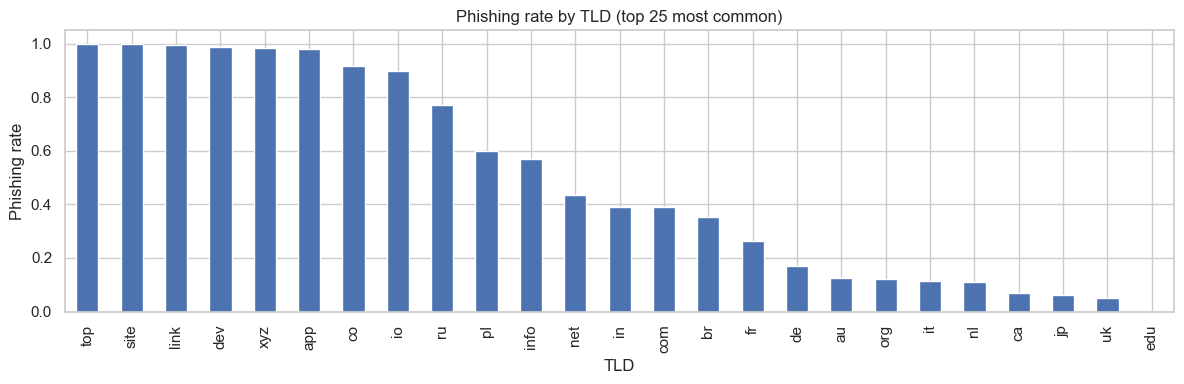

In [66]:
# TLD summary
tld_summary = (
    df.groupby("TLD")["label"]
      .agg(n_total="size", legit_rate="mean")
      .assign(phish_rate=lambda x: 1 - x["legit_rate"])
)

# Top 25 most common TLDs, sorted by phishing rate
top_common = (
    tld_summary.sort_values("n_total", ascending=False)
               .head(25)
               .sort_values("phish_rate", ascending=False)
)

# TABLE
display(top_common)

# PLOT
top_common["phish_rate"].plot(kind="bar", figsize=(12,4))
plt.title("Phishing rate by TLD (top 25 most common)")
plt.ylabel("Phishing rate")
plt.xlabel("TLD")
plt.tight_layout()
plt.show()


In [69]:
# Mutual Information between feature and target

from sklearn.feature_selection import mutual_info_classif
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

# --- MI table (top 20)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("label")
X = df[num_cols]
y = df["label"]

mi = mutual_info_classif(X, y, random_state=42)

mi_table = (pd.DataFrame({"feature": num_cols, "mutual_information": mi})
              .sort_values("mutual_information", ascending=False))

display(mi_table.head(20))


,feature,mutual_information
3,URLSimilarityIndex,0.680530
22,LineOfCode,0.600887
49,NoOfExternalRef,0.561239
44,NoOfImage,0.543638
47,NoOfSelfRef,0.527161
46,NoOfJS,0.500278
23,LargestLineLength,0.489187
45,NoOfCSS,0.447350
36,HasSocialNet,0.417792
13,LetterRatioInURL,0.381220


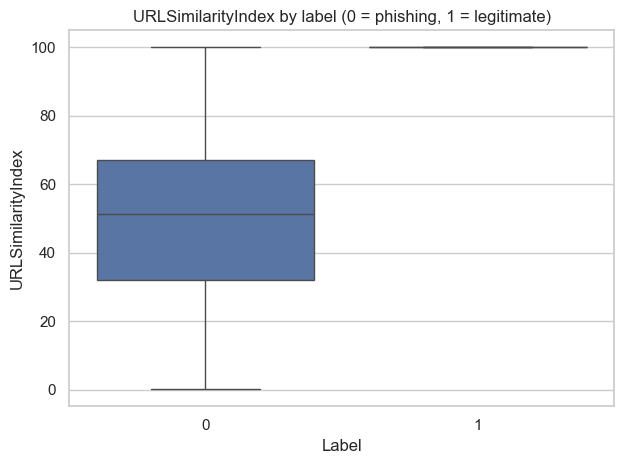

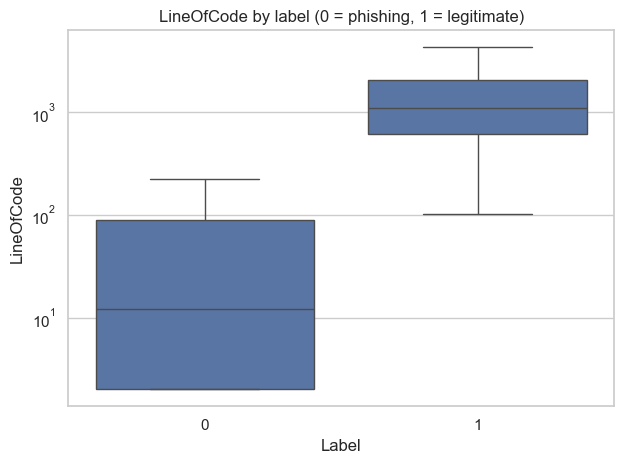

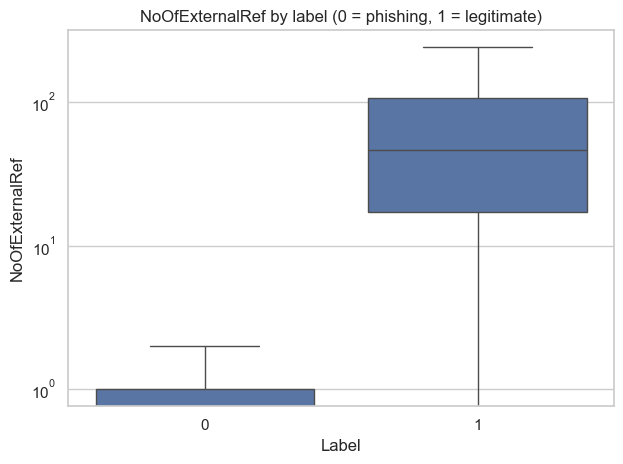

In [68]:
# MI Top Feature Plots
top_features = [
    "URLSimilarityIndex",
    "LineOfCode",
    "NoOfExternalRef"
]

for f in top_features:
    sns.boxplot(
        data=df,
        x="label",
        y=f,
        showfliers=False 
    )
    if f in ["LineOfCode", "NoOfExternalRef"]:
        plt.yscale("log")
    plt.title(f"{f} by label (0 = phishing, 1 = legitimate)")
    plt.xlabel("Label")
    plt.ylabel(f)
    plt.tight_layout()
    plt.show()

## URLSimilarityIndex Plot
This plot shows how similar a URL is to known legitimate URL patterns. Legitimate URLs cluster very tightly at high similarity values, while phishing URLs are much more spread out and generally lower. This tells us that legitimate sites tend to follow consistent, recognizable URL structures, whereas phishing URLs vary much more.

TLDR:  Tighter and higher for legitimate, wider and lower for phishing.

## LineOfCode Plot
This plot compares the amount of HTML content on the page. Phishing pages typically have very little code, while legitimate pages tend to be much larger and more complex. The log scale helps show this difference clearly, since page size varies by orders of magnitude.

TLDR:  Legitimate pages are structurally richer; phishing pages are minimal.

## NoOfExternalRef Plot
This plot shows the number of external references on a page. Legitimate websites usually link out to many other resources, while phishing pages often have very few or none. This reflects the fact that phishing pages are usually standalone and not part of a larger web ecosystem.

TLDR:  
Legitimate sites are connected; phishing sites are isolated.